In [1]:
# Import packages
import pandas as pd
import numpy as np
import datetime as dt 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
# Import departments mapping
department = pd.read_csv('departments.csv')
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [3]:
department.astype (object).describe()

,department_id,department
count,21,21
unique,21,21
top,21,snacks
freq,1,1


In [4]:
# Import order_products mapping
order_product = pd.read_csv('order_products.csv')
order_product.head()

,order_id,product_id,add_to_cart_order,reordered
0,10,24,1,1
1,10,83,2,1
2,10,16,3,0
3,10,24,4,1
4,10,83,5,1


In [5]:
order_product.astype (object).describe()

,order_id,product_id,add_to_cart_order,reordered
count,2019501,2019501,2019501,2019501
unique,200000,134,137,2
top,790903,24,1,1
freq,137,226039,200000,1190986


In [6]:
# Import orders mapping
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2425083,49125,1,2,18,NaN
1,1944304,162867,1,3,17,NaN
2,1201011,147243,14,0,16,3.0
3,1906860,195275,81,1,11,3.0
4,2766469,58222,3,6,11,6.0


In [7]:
orders.astype (object).describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,200000,200000,200000,200000,200000,187746.0
unique,200000,105273,100,7,24,31.0
top,2827660,8703,2,0,10,30.0
freq,1,15,12325,35078,17102,20982.0


In [8]:
# Import product label mapping
products = pd.read_csv('products.csv')
products.head()

,product_id,department_id,product_name
0,61,19,cookies cakes
1,104,13,spices seasonings
2,94,7,tea
3,38,1,frozen meals
4,5,13,marinades meat preparation


In [9]:
products.astype (object).describe()

,product_id,department_id,product_name
count,134,134,134
unique,134,21,134
top,134,11,eye ear care
freq,1,17,1


In [10]:
# Merge product labels
df = pd.merge(products,order_product, how='left', on='product_id')
df.head()

,product_id,department_id,product_name,order_id,add_to_cart_order,reordered
0,61,19,cookies cakes,1083,9,0
1,61,19,cookies cakes,1691,1,1
2,61,19,cookies cakes,1951,41,0
3,61,19,cookies cakes,2199,14,1
4,61,19,cookies cakes,2432,2,1


In [11]:
# Merge product labels
df = pd.merge(df,department, how='left', on='department_id')
df.head()

,product_id,department_id,product_name,order_id,add_to_cart_order,reordered,department
0,61,19,cookies cakes,1083,9,0,snacks
1,61,19,cookies cakes,1691,1,1,snacks
2,61,19,cookies cakes,1951,41,0,snacks
3,61,19,cookies cakes,2199,14,1,snacks
4,61,19,cookies cakes,2432,2,1,snacks


In [12]:
df.astype(object).describe()

,product_id,department_id,product_name,order_id,add_to_cart_order,reordered,department
count,2019501,2019501,2019501,2019501,2019501,2019501,2019501
unique,134,21,134,200000,137,2,21
top,24,4,fresh fruits,790903,1,1,produce
freq,226039,588996,226039,137,200000,1190986,588996


In [13]:
orders.astype(object).describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,200000,200000,200000,200000,200000,187746.0
unique,200000,105273,100,7,24,31.0
top,2827660,8703,2,0,10,30.0
freq,1,15,12325,35078,17102,20982.0


In [14]:
# Merge  labels
df = pd.merge(orders,df, how='left', on='order_id')
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,department_id,product_name,add_to_cart_order,reordered,department
0,2425083,49125,1,2,18,NaN,120,16,yogurt,7,0,dairy eggs
1,2425083,49125,1,2,18,NaN,35,12,poultry counter,9,0,meat seafood
2,2425083,49125,1,2,18,NaN,83,4,fresh vegetables,4,0,produce
3,2425083,49125,1,2,18,NaN,83,4,fresh vegetables,5,0,produce
4,2425083,49125,1,2,18,NaN,91,16,soy lactosefree,2,0,dairy eggs


In [15]:
df.astype(object).describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,department_id,product_name,add_to_cart_order,reordered,department
count,2019501,2019501,2019501,2019501,2019501,1895159.0,2019501,2019501,2019501,2019501,2019501,2019501
unique,200000,105273,100,7,24,31.0,134,21,134,137,2,21
top,790903,176478,1,0,10,7.0,24,4,fresh fruits,1,1,produce
freq,137,460,124342,391831,173306,214126.0,226039,588996,226039,200000,1190986,588996


In [16]:
column_names = ["user_id",'order_id', 'product_id', 'product_name', 'department_id','department', 'add_to_cart_order','reordered','order_number','order_dow','order_hour_of_day','days_since_prior_order']
df = df.reindex(columns=column_names)
df.head()

,user_id,order_id,product_id,product_name,department_id,department,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,49125,2425083,120,yogurt,16,dairy eggs,7,0,1,2,18,NaN
1,49125,2425083,35,poultry counter,12,meat seafood,9,0,1,2,18,NaN
2,49125,2425083,83,fresh vegetables,4,produce,4,0,1,2,18,NaN
3,49125,2425083,83,fresh vegetables,4,produce,5,0,1,2,18,NaN
4,49125,2425083,91,soy lactosefree,16,dairy eggs,2,0,1,2,18,NaN


In [17]:
len (df ["product_name"].unique())

134

### MBA metrics

In [18]:
df_analysis_product = df [["order_id", "product_name"]]

In [19]:
# Pivot the data - lines as orders and products as columns
pt_product = pd.pivot_table(df_analysis_product, index='order_id', columns='product_name', 
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pt_product.head()

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### A Priori
-Reduce the complexity of large datasets by eliminating low support itemsets;

-Does not require enumeration of all itemsets;

-Sensible criteria for pruning;

-"Subsets of frequent sets are frequent".

In [20]:
# Apply the APRIORI algorithm to get frequent itemsets
# Rules supported in at least 5% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(pt_product, min_support=0.05, use_colnames=True)
print (len(frequent_itemsets))

156


In [21]:
frequent_itemsets_3 = apriori(pt_product, min_support=0.03, use_colnames=True)
print (len(frequent_itemsets_3))

397


#### Support = measures the share of transactions that contain an itemset
Support is the relative frequency that the rules show up. In many instances, you may want to look for high support in order to make sure it is a useful relationship.

In [22]:
# Generate the association rules - by support
rulesSupport = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)
rulesSupport.sort_values(by='support', ascending=False, inplace=True)
rulesSupport

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,(fresh vegetables),(fresh fruits),0.444360,0.555995,0.317560,0.714646,1.285346,0.070498,1.555978
52,(fresh fruits),(fresh vegetables),0.555995,0.444360,0.317560,0.571156,1.285346,0.070498,1.295670
72,(fresh fruits),(packaged vegetables fruits),0.555995,0.365415,0.269870,0.485382,1.328304,0.066701,1.233119
73,(packaged vegetables fruits),(fresh fruits),0.365415,0.555995,0.269870,0.738530,1.328304,0.066701,1.698112
103,(fresh vegetables),(packaged vegetables fruits),0.444360,0.365415,0.234555,0.527849,1.444519,0.072179,1.344030
...,...,...,...,...,...,...,...,...,...
185,(fresh vegetables),"(packaged vegetables fruits, eggs)",0.444360,0.068650,0.050675,0.114040,1.661186,0.020170,1.051233
184,"(packaged vegetables fruits, eggs)",(fresh vegetables),0.068650,0.444360,0.050675,0.738165,1.661186,0.020170,2.122097
182,"(packaged vegetables fruits, fresh vegetables)",(eggs),0.234555,0.136490,0.050675,0.216047,1.582881,0.018661,1.101482
14,(canned meals beans),(fresh vegetables),0.069705,0.444360,0.050435,0.723549,1.628295,0.019461,2.009906


#### Confidence = Probability that we will purchase Y (consequent), given that we have purchased X (antecedent)

Confidence is a measure of the reliability of the rule. A confidence of .5 in the above example would mean that in 50% of the cases where X was purchased, the purchase also included Y. 

In [23]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.50)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
64,"(fresh fruits, fresh herbs)",(fresh vegetables),0.070135,0.444360,0.061815,0.881372,1.983463,0.030650,4.683872
125,"(yogurt, packaged vegetables fruits, fresh veg...",(fresh fruits),0.087995,0.555995,0.076240,0.866413,1.558311,0.027315,3.323711
115,"(milk, packaged vegetables fruits, fresh veget...",(fresh fruits),0.073075,0.555995,0.062535,0.855765,1.539159,0.021906,3.078336
34,(fresh herbs),(fresh vegetables),0.093005,0.444360,0.078655,0.845707,1.903203,0.037327,3.601205
120,"(packaged vegetables fruits, packaged cheese, ...",(fresh fruits),0.081970,0.555995,0.068325,0.833537,1.499180,0.022750,2.667284
...,...,...,...,...,...,...,...,...,...
97,"(fresh fruits, water seltzer sparkling water)",(packaged vegetables fruits),0.111045,0.365415,0.056550,0.509253,1.393629,0.015972,1.293100
69,(frozen produce),"(fresh fruits, fresh vegetables)",0.122580,0.317560,0.062170,0.507179,1.597112,0.023243,1.384762
10,(eggs),(packaged vegetables fruits),0.136490,0.365415,0.068650,0.502967,1.376427,0.018775,1.276747
122,"(packaged cheese, fresh vegetables)","(fresh fruits, packaged vegetables fruits)",0.135850,0.269870,0.068325,0.502944,1.863654,0.031663,1.468910


#### Lift > 1 it means that 2 items occur together more often than expected

Lift is the ratio of the observed support to that expected if the two rules were independent. The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.

In [24]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
187,"(fresh fruits, fresh vegetables)",(fresh herbs),0.317560,0.093005,0.061815,0.194656,2.092964,0.032280,1.126221
190,(fresh herbs),"(fresh fruits, fresh vegetables)",0.093005,0.317560,0.061815,0.664642,2.092964,0.032280,2.034958
191,(fresh vegetables),"(fresh fruits, fresh herbs)",0.444360,0.070135,0.061815,0.139110,1.983463,0.030650,1.080121
186,"(fresh fruits, fresh herbs)",(fresh vegetables),0.070135,0.444360,0.061815,0.881372,1.983463,0.030650,4.683872
375,"(fresh fruits, packaged vegetables fruits)","(yogurt, fresh vegetables)",0.269870,0.144660,0.076240,0.282506,1.952899,0.037201,1.192122
...,...,...,...,...,...,...,...,...,...
130,(packaged vegetables fruits),(water seltzer sparkling water),0.365415,0.193005,0.073715,0.201730,1.045204,0.003188,1.010929
83,(water seltzer sparkling water),(fresh fruits),0.193005,0.555995,0.111045,0.575348,1.034807,0.003735,1.045573
82,(fresh fruits),(water seltzer sparkling water),0.555995,0.193005,0.111045,0.199723,1.034807,0.003735,1.008395
233,(water seltzer sparkling water),"(fresh fruits, fresh vegetables)",0.193005,0.317560,0.063235,0.327634,1.031723,0.001944,1.014983


#### Leverage if > 0 as similar interpretation to lift. The only difference is that leverage is between -1 and +1 and lift between 0 and + infinite

The idea is to measure how much more counting is obtained from the co-occurrence of the antecedent and consequent from the expected, i.e., from independence. 

In [25]:
# Generate the association rules - by leverage
rulesLeverage = association_rules(frequent_itemsets, metric="leverage", min_threshold=0)
rulesLeverage.sort_values(by='leverage', ascending=False, inplace=True)
rulesLeverage

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
102,(packaged vegetables fruits),(fresh vegetables),0.365415,0.444360,0.234555,0.641887,1.444519,0.072179,1.551576
103,(fresh vegetables),(packaged vegetables fruits),0.444360,0.365415,0.234555,0.527849,1.444519,0.072179,1.344030
214,(packaged vegetables fruits),"(fresh fruits, fresh vegetables)",0.365415,0.317560,0.186580,0.510598,1.607877,0.070539,1.394435
211,"(fresh fruits, fresh vegetables)",(packaged vegetables fruits),0.317560,0.365415,0.186580,0.587543,1.607877,0.070539,1.538546
53,(fresh vegetables),(fresh fruits),0.444360,0.555995,0.317560,0.714646,1.285346,0.070498,1.555978
...,...,...,...,...,...,...,...,...,...
59,(ice cream ice),(fresh fruits),0.110510,0.555995,0.064485,0.583522,1.049509,0.003042,1.066094
92,(ice cream ice),(fresh vegetables),0.110510,0.444360,0.051995,0.470500,1.058827,0.002889,1.049368
93,(fresh vegetables),(ice cream ice),0.444360,0.110510,0.051995,0.117011,1.058827,0.002889,1.007362
228,"(fresh fruits, fresh vegetables)",(water seltzer sparkling water),0.317560,0.193005,0.063235,0.199128,1.031723,0.001944,1.007645


#### Conviction > 1, x and not y occur together less frequently than expected

For example, the rule {milk,bread} -> {butter} has a conviction of 1.2, and can be interpreted as the ratio of the expected frequency that X occurs without Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions. In this example, the conviction value of 1.2 shows that the rule would be incorrect 20% more often (1.2 times as often) if the association between X and Y was purely random chance.

In [26]:
# Generate the association rules - by conviction
rulesConviction = association_rules(frequent_itemsets, metric="conviction", min_threshold=1)
rulesConviction.sort_values(by='conviction', ascending=False, inplace=True)
rulesConviction

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
186,"(fresh fruits, fresh herbs)",(fresh vegetables),0.070135,0.444360,0.061815,0.881372,1.983463,0.030650,4.683872
86,(fresh herbs),(fresh vegetables),0.093005,0.444360,0.078655,0.845707,1.903203,0.037327,3.601205
373,"(yogurt, packaged vegetables fruits, fresh veg...",(fresh fruits),0.087995,0.555995,0.076240,0.866413,1.558311,0.027315,3.323711
345,"(milk, packaged vegetables fruits, fresh veget...",(fresh fruits),0.073075,0.555995,0.062535,0.855765,1.539159,0.021906,3.078336
359,"(packaged vegetables fruits, packaged cheese, ...",(fresh fruits),0.081970,0.555995,0.068325,0.833537,1.499180,0.022750,2.667284
...,...,...,...,...,...,...,...,...,...
130,(packaged vegetables fruits),(water seltzer sparkling water),0.365415,0.193005,0.073715,0.201730,1.045204,0.003188,1.010929
82,(fresh fruits),(water seltzer sparkling water),0.555995,0.193005,0.111045,0.199723,1.034807,0.003735,1.008395
228,"(fresh fruits, fresh vegetables)",(water seltzer sparkling water),0.317560,0.193005,0.063235,0.199128,1.031723,0.001944,1.007645
93,(fresh vegetables),(ice cream ice),0.444360,0.110510,0.051995,0.117011,1.058827,0.002889,1.007362


#### Measure of dissociation: Zhang's metric

-1 < Zhang < +1 
1 is perfect association
-1 is perfect dissociation

Zhang, T. (2000). Association Rules. Proceedings of the 4th Pacific-Asia conference, PADKK, pp.245-256. Kyoto, Japan.

 


In [27]:
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)

# Funtion to compute Zhang's rule from mlxtend association_rules output
def zhangs_rule(rules):
    PAB = rules['support'].copy()
    PA = rules['antecedent support'].copy()
    PB = rules['consequent support'].copy()
    NUMERATOR = PAB - PA*PB
    DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
    return NUMERATOR / DENOMINATOR

In [28]:
# Compute Zhang's rule
rules['zhang'] = zhangs_rule(rules)
rules.sort_values(by='zhang', ascending=False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
193,(fresh vegetables),"(fresh fruits, fresh herbs)",0.444360,0.070135,0.061815,0.139110,1.983463,0.030650,1.080121,0.892361
87,(fresh vegetables),(fresh herbs),0.444360,0.093005,0.078655,0.177007,1.903203,0.037327,1.102069,0.854096
382,(fresh fruits),"(yogurt, packaged vegetables fruits, fresh veg...",0.555995,0.087995,0.076240,0.137124,1.558311,0.027315,1.056936,0.806926
354,(fresh fruits),"(milk, packaged vegetables fruits, fresh veget...",0.555995,0.073075,0.062535,0.112474,1.539159,0.021906,1.044392,0.788943
189,"(fresh fruits, fresh vegetables)",(fresh herbs),0.317560,0.093005,0.061815,0.194656,2.092964,0.032280,1.126221,0.765208
...,...,...,...,...,...,...,...,...,...,...
230,"(fresh fruits, fresh vegetables)",(water seltzer sparkling water),0.317560,0.193005,0.063235,0.199128,1.031723,0.001944,1.007645,0.045056
83,(water seltzer sparkling water),(fresh fruits),0.193005,0.555995,0.111045,0.575348,1.034807,0.003735,1.045573,0.041681
235,(water seltzer sparkling water),"(fresh fruits, fresh vegetables)",0.193005,0.317560,0.063235,0.327634,1.031723,0.001944,1.014983,0.038102
111,(water seltzer sparkling water),(fresh vegetables),0.193005,0.444360,0.083355,0.431880,0.971915,-0.002409,0.978033,-0.034570


# Association Analysis 


#### In order to perform our analysis, we followed a simple standard process: first, we used the A Priori algorithm to prune our dataset. For this, several minimum support levels were tested: 1%, 3% and 5%. 
#### Let's first analyze the departments and then the products


### Aggregation by department

In [29]:
df_analysis_department = df [["order_id", "department"]]

In [30]:
# Pivot the data - lines as orders and products as columns
pt_department = pd.pivot_table(df_analysis_department, index='order_id', columns='department', 
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pt_department.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
56,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Min_support = 0.05

In [31]:
# Compute frequent itemsets using the Apriori algorithm
frequent_departments = apriori(pt_department, 
                            min_support = 0.05, 
                            max_len = 2, 
                            use_colnames = True)

### Advanced filtering with multiple metrics

##### Complementary using confidence and lift

In [32]:
# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_departments, metric = 'support', min_threshold = 0.01)

# High Confidence and high lift - complementary products
filtered_rules = rules[(rules['confidence'] > 0.6) &
                       (rules['lift'] > 1)]

# Compute Zhang's rule
filtered_rules['zhang'] = zhangs_rule(rules)

# Print remaining rule
filtered_rules.sort_values(by='zhang', ascending= False ).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
57,(breakfast),(snacks),0.163495,0.433825,0.100050,0.611945,1.410581,0.029122,1.459008,0.347962
91,(produce),(dairy eggs),0.748065,0.675600,0.549105,0.734034,1.086492,0.043712,1.219704,0.315980
90,(dairy eggs),(produce),0.675600,0.748065,0.549105,0.812766,1.086492,0.043712,1.345565,0.245396
7,(bakery),(dairy eggs),0.273565,0.675600,0.224615,0.821066,1.215314,0.039794,1.812962,0.243886
76,(dry goods pasta),(dairy eggs),0.186190,0.675600,0.154275,0.828589,1.226449,0.028485,1.892528,0.226881
47,(breakfast),(dairy eggs),0.163495,0.675600,0.135295,0.827518,1.224863,0.024838,1.880772,0.219464
75,(deli),(dairy eggs),0.238885,0.675600,0.192520,0.805911,1.192882,0.031129,1.671396,0.212443
59,(canned goods),(dairy eggs),0.211275,0.675600,0.169685,0.803148,1.188792,0.026948,1.647935,0.201350
78,(frozen),(dairy eggs),0.367530,0.675600,0.283205,0.770563,1.140561,0.034902,1.413895,0.194853
84,(meat seafood),(dairy eggs),0.179535,0.675600,0.144200,0.803186,1.188848,0.022906,1.648257,0.193610


##### Substitutes

In [33]:
# Substitue products

filtered_sub_rules = association_rules(frequent_departments, metric="lift", min_threshold=0.0) 

filtered_sub_rules = rules[(rules['lift'] < 1)]


filtered_sub_rules['zhang'] = zhangs_rule(filtered_sub_rules)

# Print remaining rule
filtered_sub_rules.sort_values(by='zhang', ascending= True ).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
129,(produce),(household),0.748065,0.147675,0.102695,0.137281,0.929615,-0.007775,0.987952,-0.231084
145,(produce),(personal care),0.748065,0.099480,0.070550,0.094310,0.948030,-0.003868,0.994292,-0.178708
128,(household),(produce),0.147675,0.748065,0.102695,0.695412,0.929615,-0.007775,0.827134,-0.081585
43,(produce),(beverages),0.748065,0.456190,0.334630,0.447327,0.980573,-0.006630,0.983964,-0.072907
144,(personal care),(produce),0.099480,0.748065,0.070550,0.709188,0.948030,-0.003868,0.866315,-0.057382
42,(beverages),(produce),0.456190,0.748065,0.334630,0.733532,0.980573,-0.006630,0.945461,-0.035152


# Min_support = 0.03

In [34]:
# Compute frequent itemsets using the Apriori algorithm
frequent_departments3 = apriori(pt_department, 
                            min_support = 0.03, 
                            max_len = 2, 
                           use_colnames = True)

### Advanced filtering with multiple metrics

##### Complementary using confidence and lift

In [35]:
# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_departments3, metric = 'support', min_threshold = 0.01)

# High Confidence and high lift - complementary products
filtered_rules = rules[(rules['confidence'] > 0.6) &
                       (rules['lift'] > 1)]

# Compute Zhang's rule
filtered_rules['zhang'] = zhangs_rule(rules)

# Print remaining rule
filtered_rules.sort_values(by='zhang', ascending= False ).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
158,(household),(personal care),0.147675,0.099480,0.033120,0.224276,2.254486,0.018429,1.160877,0.652849
159,(personal care),(household),0.099480,0.147675,0.033120,0.332931,2.254486,0.018429,1.277717,0.617910
93,(produce),(canned goods),0.748065,0.211275,0.185695,0.248234,1.174932,0.027648,1.049163,0.590974
173,(produce),(meat seafood),0.748065,0.179535,0.157300,0.210276,1.171225,0.022996,1.038926,0.580280
83,(canned goods),(dry goods pasta),0.211275,0.186190,0.071845,0.340054,1.826384,0.032508,1.233147,0.573673
99,(dairy eggs),(dry goods pasta),0.675600,0.186190,0.154275,0.228353,1.226449,0.028485,1.054640,0.569168
60,(dairy eggs),(breakfast),0.675600,0.163495,0.135295,0.200259,1.224863,0.024838,1.045970,0.565914
1,(dairy eggs),(babies),0.675600,0.054550,0.045045,0.066674,1.222256,0.008191,1.012990,0.560545
165,(pantry),(international),0.347545,0.068990,0.037750,0.108619,1.574417,0.013773,1.044458,0.559187
82,(dry goods pasta),(canned goods),0.186190,0.211275,0.071845,0.385869,1.826384,0.032508,1.284295,0.555990


##### Substitutes

In [36]:
# Substitue products

filtered_sub_rules = association_rules(frequent_departments3, metric="lift", min_threshold=0.0) 

filtered_sub_rules = rules[(rules['lift'] < 1)]


filtered_sub_rules['zhang'] = zhangs_rule(filtered_sub_rules)

# Print remaining rule
filtered_sub_rules.sort_values(by='zhang', ascending= True ).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
161,(produce),(household),0.748065,0.147675,0.102695,0.137281,0.929615,-0.007775,0.987952,-0.231084
183,(produce),(personal care),0.748065,0.099480,0.070550,0.094310,0.948030,-0.003868,0.994292,-0.178708
160,(household),(produce),0.147675,0.748065,0.102695,0.695412,0.929615,-0.007775,0.827134,-0.081585
55,(produce),(beverages),0.748065,0.456190,0.334630,0.447327,0.980573,-0.006630,0.983964,-0.072907
182,(personal care),(produce),0.099480,0.748065,0.070550,0.709188,0.948030,-0.003868,0.866315,-0.057382
54,(beverages),(produce),0.456190,0.748065,0.334630,0.733532,0.980573,-0.006630,0.945461,-0.035152


# Min_support = 0.01

In [37]:
# Compute frequent itemsets using the Apriori algorithm
frequent_departments1= apriori(pt_department, 
                            min_support = 0.01, 
                            max_len = 2, 
                            use_colnames = True)

### Advanced filtering with multiple metrics

##### Complementary

In [38]:
# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_departments1, metric = 'support', min_threshold = 0.01)

# High Confidence and high lift - complementary products
filtered_rules = rules[(rules['confidence'] > 0.6) &
                       (rules['lift'] > 1)]

# Compute Zhang's rule
filtered_rules['zhang'] = zhangs_rule(rules)

# Print remaining rule
filtered_rules.sort_values(by='zhang', ascending= False ).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
113,(breakfast),(snacks),0.163495,0.433825,0.100050,0.611945,1.410581,0.029122,1.459008,0.347962
157,(produce),(dairy eggs),0.748065,0.675600,0.549105,0.734034,1.086492,0.043712,1.219704,0.315980
84,(pets),(beverages),0.018390,0.456190,0.011120,0.604676,1.325493,0.002731,1.375607,0.250164
156,(dairy eggs),(produce),0.675600,0.748065,0.549105,0.812766,1.086492,0.043712,1.345565,0.245396
39,(bakery),(dairy eggs),0.273565,0.675600,0.224615,0.821066,1.215314,0.039794,1.812962,0.243886
138,(dry goods pasta),(dairy eggs),0.186190,0.675600,0.154275,0.828589,1.226449,0.028485,1.892528,0.226881
93,(breakfast),(dairy eggs),0.163495,0.675600,0.135295,0.827518,1.224863,0.024838,1.880772,0.219464
137,(deli),(dairy eggs),0.238885,0.675600,0.192520,0.805911,1.192882,0.031129,1.671396,0.212443
115,(canned goods),(dairy eggs),0.211275,0.675600,0.169685,0.803148,1.188792,0.026948,1.647935,0.201350
140,(frozen),(dairy eggs),0.367530,0.675600,0.283205,0.770563,1.140561,0.034902,1.413895,0.194853


# Substitute products

In [39]:
# Substitue products

filtered_sub_rules = association_rules(frequent_departments1, metric="lift", min_threshold=0.0) 

filtered_sub_rules = rules[(rules['lift'] < 1)]


filtered_sub_rules['zhang'] = zhangs_rule(filtered_sub_rules)

# Print remaining rule
filtered_sub_rules.sort_values(by='zhang', ascending= True ).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
4,(produce),(alcohol),0.748065,0.026005,0.012860,0.017191,0.661066,-0.006593,0.991032,-0.670520
2,(dairy eggs),(alcohol),0.675600,0.026005,0.012800,0.018946,0.728557,-0.004769,0.992805,-0.534561
253,(produce),(pets),0.748065,0.018390,0.011955,0.015981,0.869017,-0.001802,0.997552,-0.374323
5,(alcohol),(produce),0.026005,0.748065,0.012860,0.494520,0.661066,-0.006593,0.498408,-0.344863
3,(alcohol),(dairy eggs),0.026005,0.675600,0.012800,0.492213,0.728557,-0.004769,0.638851,-0.276685
219,(produce),(household),0.748065,0.147675,0.102695,0.137281,0.929615,-0.007775,0.987952,-0.231084
249,(produce),(personal care),0.748065,0.099480,0.070550,0.094310,0.948030,-0.003868,0.994292,-0.178708
252,(pets),(produce),0.018390,0.748065,0.011955,0.650082,0.869017,-0.001802,0.719982,-0.133110
218,(household),(produce),0.147675,0.748065,0.102695,0.695412,0.929615,-0.007775,0.827134,-0.081585
87,(produce),(beverages),0.748065,0.456190,0.334630,0.447327,0.980573,-0.006630,0.983964,-0.072907


# Visualizations

In [40]:
# Function to convert rules to coordinates.
from pandas.plotting import parallel_coordinates
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

##### Paralell coordinates plot

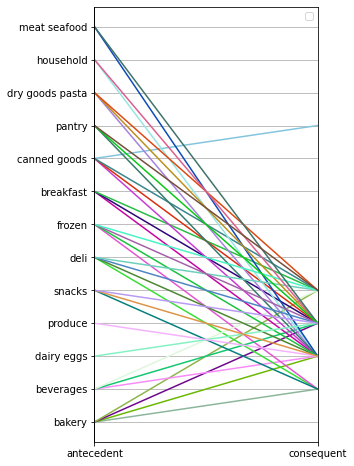

In [41]:
# Analyse with all departments

# Compute the frequent itemsets
frequent_itemsets = apriori(pt_department, min_support = 0.10, 
                            use_colnames = True, max_len = 2)

# Compute rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric = 'confidence', 
                          min_threshold = 0.50)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

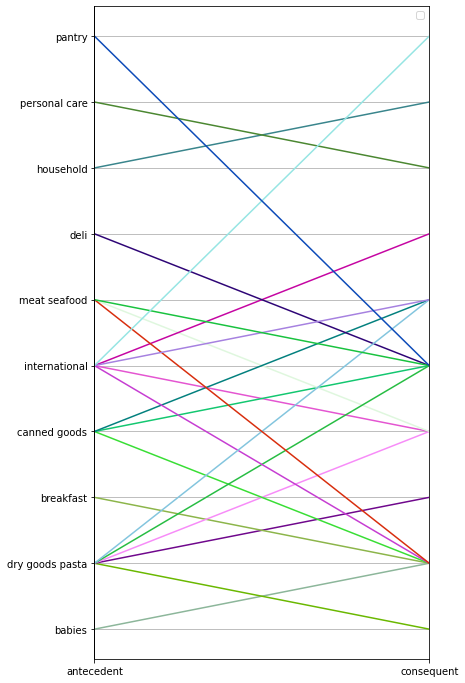

In [42]:
# Analyse without the biggest departments
# Compute the frequent itemsets
frequent_itemsets = apriori(pt_department, min_support = 0.01, 
                            use_colnames = True, max_len = 2)

# Compute rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric = 'lift', 
                          min_threshold = 1.50)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(6,12))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

#  Analyze the products

# Min_support = 0.05

In [43]:
# Compute frequent itemsets using the Apriori algorithm
frequent_products5 = apriori(pt_product, 
                            min_support = 0.05, 
                            max_len = 2, 
                            use_colnames = True)

### Advanced filtering with multiple metrics

##### Complementary

In [44]:
# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_products5, metric = 'support', min_threshold = 0.01)

# High Confidence and high lift - complementary products
filtered_rules = rules[(rules['confidence'] > 0.6) &
                       (rules['lift'] > 1)]

# Compute Zhang's rule
filtered_rules['zhang'] = zhangs_rule(rules)

# Print remaining rule
filtered_rules.sort_values(by='zhang', ascending= False ).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
86,(fresh herbs),(fresh vegetables),0.093005,0.444360,0.078655,0.845707,1.903203,0.037327,3.601205,0.523233
102,(packaged vegetables fruits),(fresh vegetables),0.365415,0.444360,0.234555,0.641887,1.444519,0.072179,1.551576,0.484928
12,(canned jarred vegetables),(fresh vegetables),0.071890,0.444360,0.055055,0.765823,1.723429,0.023110,2.372733,0.452275
14,(canned meals beans),(fresh vegetables),0.069705,0.444360,0.050435,0.723549,1.628295,0.019461,2.009906,0.414772
53,(fresh vegetables),(fresh fruits),0.444360,0.555995,0.317560,0.714646,1.285346,0.070498,1.555978,0.399538
73,(packaged vegetables fruits),(fresh fruits),0.365415,0.555995,0.269870,0.738530,1.328304,0.066701,1.698112,0.389483
106,(soup broth bouillon),(fresh vegetables),0.083365,0.444360,0.055380,0.664308,1.494976,0.018336,1.655206,0.361205
90,(frozen produce),(fresh vegetables),0.122580,0.444360,0.077750,0.634280,1.427400,0.023280,1.519303,0.341257
39,(eggs),(fresh vegetables),0.136490,0.444360,0.084310,0.617701,1.390091,0.023659,1.453417,0.324979
85,(yogurt),(fresh fruits),0.263675,0.555995,0.188225,0.713852,1.283919,0.041623,1.551664,0.300322


##### Substitutes

In [45]:
# Substitue products

filtered_sub_rules = association_rules(frequent_products5, metric="lift", min_threshold=0.0) 

filtered_sub_rules = rules[(rules['lift'] < 1)]


filtered_sub_rules['zhang'] = zhangs_rule(filtered_sub_rules)

# Print remaining rule
filtered_sub_rules.sort_values(by='zhang', ascending= True ).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
110,(fresh vegetables),(water seltzer sparkling water),0.444360,0.193005,0.083355,0.187584,0.971915,-0.002409,0.993328,-0.049436
111,(water seltzer sparkling water),(fresh vegetables),0.193005,0.444360,0.083355,0.431880,0.971915,-0.002409,0.978033,-0.034570


# Min_support = 0.03

In [46]:
# Compute frequent itemsets using the Apriori algorithm
frequent_products3 = apriori(pt_product, 
                            min_support = 0.03, 
                            max_len = 2, 
                            use_colnames = True)

### Advanced filtering with multiple metrics

##### Complementary

In [47]:
# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_products3, metric = 'support', min_threshold = 0.01)

# High Confidence and high lift - complementary products
filtered_rules = rules[(rules['confidence'] > 0.6) &
                       (rules['lift'] > 1)]

# Compute Zhang's rule
filtered_rules['zhang'] = zhangs_rule(rules)

# Print remaining rule
filtered_rules.sort_values(by='zhang', ascending= False ).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
220,(fresh herbs),(fresh vegetables),0.093005,0.444360,0.078655,0.845707,1.903203,0.037327,3.601205,0.523233
250,(packaged vegetables fruits),(fresh vegetables),0.365415,0.444360,0.234555,0.641887,1.444519,0.072179,1.551576,0.484928
44,(canned jarred vegetables),(fresh vegetables),0.071890,0.444360,0.055055,0.765823,1.723429,0.023110,2.372733,0.452275
50,(canned meals beans),(fresh vegetables),0.069705,0.444360,0.050435,0.723549,1.628295,0.019461,2.009906,0.414772
159,(fresh vegetables),(fresh fruits),0.444360,0.555995,0.317560,0.714646,1.285346,0.070498,1.555978,0.399538
195,(packaged vegetables fruits),(fresh fruits),0.365415,0.555995,0.269870,0.738530,1.328304,0.066701,1.698112,0.389483
260,(spices seasonings),(fresh vegetables),0.052165,0.444360,0.036660,0.702770,1.581533,0.013480,1.869394,0.387939
120,(dry pasta),(fresh vegetables),0.070055,0.444360,0.047235,0.674256,1.517364,0.016105,1.705756,0.366648
256,(soup broth bouillon),(fresh vegetables),0.083365,0.444360,0.055380,0.664308,1.494976,0.018336,1.655206,0.361205
252,(pasta sauce),(fresh vegetables),0.062660,0.444360,0.041005,0.654405,1.472690,0.013161,1.607777,0.342427


##### Substitutes

In [48]:
# Substitue products

filtered_sub_rules = association_rules(frequent_products3, metric="lift", min_threshold=0.0) 

filtered_sub_rules = rules[(rules['lift'] < 1)]


filtered_sub_rules['zhang'] = zhangs_rule(filtered_sub_rules)

# Print remaining rule
filtered_sub_rules.sort_values(by='zhang', ascending= True ).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
202,(fresh fruits),(soft drinks),0.555995,0.087310,0.039585,0.071197,0.815447,-0.008959,0.982652,-0.337628
203,(soft drinks),(fresh fruits),0.087310,0.555995,0.039585,0.453384,0.815447,-0.008959,0.812280,-0.198700
196,(fresh fruits),(paper goods),0.555995,0.063575,0.032090,0.057716,0.907847,-0.003257,0.993782,-0.186078
197,(paper goods),(fresh fruits),0.063575,0.555995,0.032090,0.504758,0.907847,-0.003257,0.896542,-0.097798
266,(fresh vegetables),(water seltzer sparkling water),0.444360,0.193005,0.083355,0.187584,0.971915,-0.002409,0.993328,-0.049436
267,(water seltzer sparkling water),(fresh vegetables),0.193005,0.444360,0.083355,0.431880,0.971915,-0.002409,0.978033,-0.034570
316,(milk),(water seltzer sparkling water),0.243325,0.193005,0.046610,0.191555,0.992485,-0.000353,0.998206,-0.009908
317,(water seltzer sparkling water),(milk),0.193005,0.243325,0.046610,0.241496,0.992485,-0.000353,0.997589,-0.009296


# Min_support = 0.01

In [49]:
# Compute frequent itemsets using the Apriori algorithm
frequent_products1 = apriori(pt_product, 
                            min_support = 0.01, 
                            max_len = 2, 
                            use_colnames = True)

### Advanced filtering with multiple metrics

##### Complementary

In [50]:
# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_products1, metric = 'support', min_threshold = 0.01)

# High Confidence and high lift - complementary products
filtered_rules = rules[(rules['confidence'] > 0.6)
                       &
                       (rules['lift'] > 1)]

# Compute Zhang's rule
filtered_rules['zhang'] = zhangs_rule(rules)

# Print remaining rule
filtered_rules.sort_values(by='zhang', ascending= False ).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
996,(fresh herbs),(fresh vegetables),0.093005,0.444360,0.078655,0.845707,1.903203,0.037327,3.601205,0.523233
1086,(packaged vegetables fruits),(fresh vegetables),0.365415,0.444360,0.234555,0.641887,1.444519,0.072179,1.551576,0.484928
312,(canned jarred vegetables),(fresh vegetables),0.071890,0.444360,0.055055,0.765823,1.723429,0.023110,2.372733,0.452275
1096,(poultry counter),(fresh vegetables),0.038980,0.444360,0.029290,0.751411,1.690996,0.011969,2.235175,0.425207
1068,(meat counter),(fresh vegetables),0.021855,0.444360,0.016515,0.755662,1.700563,0.006804,2.274066,0.421164
350,(canned meals beans),(fresh vegetables),0.069705,0.444360,0.050435,0.723549,1.628295,0.019461,2.009906,0.414772
1044,(grains rice dried goods),(fresh vegetables),0.040185,0.444360,0.029200,0.726639,1.635249,0.011343,2.032626,0.404737
1120,(tofu meat alternatives),(fresh vegetables),0.032860,0.444360,0.023910,0.727632,1.637484,0.009308,2.040037,0.402534
891,(fresh vegetables),(fresh fruits),0.444360,0.555995,0.317560,0.714646,1.285346,0.070498,1.555978,0.399538
1060,(latino foods),(fresh vegetables),0.021275,0.444360,0.015450,0.726204,1.634271,0.005996,2.029398,0.396543


##### Substitutes

In [51]:
# Substitue products

rulesLift2 = association_rules(frequent_products1, metric="lift", min_threshold=0.0) 

rulesLift2 = rules[(rules['confidence'] > 0) &
                       (rules['lift'] < 1)]

rulesLift2['zhang'] = zhangs_rule(rules)

# Print remaining rule
rulesLift2.sort_values(by='zhang', ascending= True ).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
1107,(fresh vegetables),(soft drinks),0.444360,0.087310,0.027845,0.062663,0.717709,-0.010952,0.973705,-0.414476
974,(fresh fruits),(soft drinks),0.555995,0.087310,0.039585,0.071197,0.815447,-0.008959,0.982652,-0.337628
1551,(packaged vegetables fruits),(soft drinks),0.365415,0.087310,0.024480,0.066992,0.767293,-0.007424,0.978223,-0.323375
844,(fresh fruits),(energy sports drinks),0.555995,0.024410,0.011220,0.020180,0.826712,-0.002352,0.995683,-0.320695
1106,(soft drinks),(fresh vegetables),0.087310,0.444360,0.027845,0.318921,0.717709,-0.010952,0.815823,-0.301163
1085,(fresh vegetables),(packaged produce),0.444360,0.062270,0.022580,0.050815,0.816037,-0.005090,0.987931,-0.288620
1530,(yogurt),(packaged produce),0.263675,0.062270,0.012665,0.048033,0.771360,-0.003754,0.985044,-0.287015
1615,(soy lactosefree),(soft drinks),0.168355,0.087310,0.011150,0.066229,0.758551,-0.003549,0.977424,-0.276798
525,(fresh fruits),(cleaning products),0.555995,0.027800,0.013325,0.023966,0.862088,-0.002132,0.996072,-0.264868
1614,(soft drinks),(soy lactosefree),0.087310,0.168355,0.011150,0.127706,0.758551,-0.003549,0.953400,-0.258574


# Visualizations


##### Heatmap

A heatmap visualizes the intensity of the relationships between pairs of objects. This is useful for our purposes because market basket analysis involves the generation of rules between antecedent-consequent pairs. And those rules can be evaluated using metrics, which are a measure of the intensity of some dimension of the relationship

In [52]:
# Apply the Apriori algorithm with a minimum support threshold of 0.05
frequent_itemsets = apriori(pt_product, min_support=0.15, max_len = 2, use_colnames=True)

# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.01)

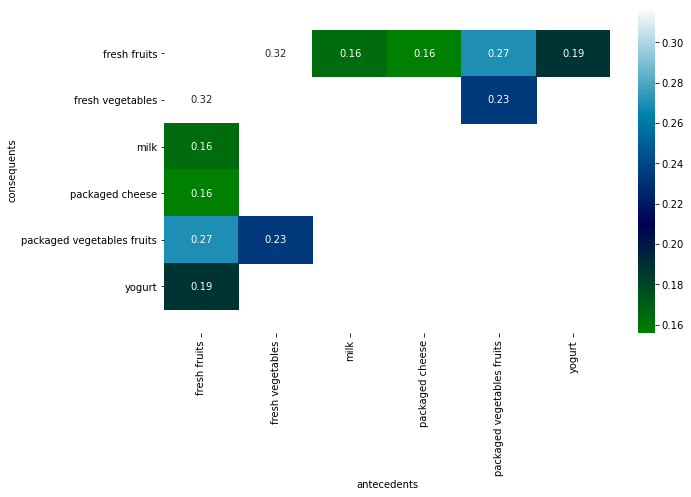

In [53]:
# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=True, cmap = 'ocean')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show() 

##### Scatterplot

Scatterplots will help is to evaluate general tendencies in the behaviors of rules for many antecedents and consequents, but without isolating any rule in particular.

Scatterplots are useful in market basket analysis because they can provide guidance for further pruning rounds. Identifying the correct pruning thresholds may be difficult to do via trial-and-error, but looking at a scatterplot could make it clear where the relevant thresholds are located.

Research by Bayardo and Agrawal in 1999 proved that the best-performing rules along a wide variety of common metrics -- including lift, conviction, confidence, support, and others not mentioned in this course -- must be located on the confidence-support border. In the plot, we can see what looks like a triangle. The points in the interior of the triangle are dominated by the points on its edges according to Bayardo-Agrawal. This suggests that we should make use of pruning to try to eliminate them.

1 Bayardo Jr., R.J. and Agrawal, R. (1999). Mining the Most Interesting Rules. In Proceedings of the Fifth ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 145-154).

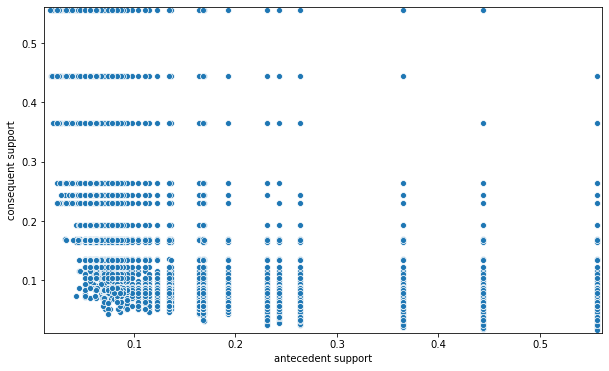

In [54]:
## Apply the Apriori algorithm with a support value of 0.0095
frequent_itemsets = apriori(pt_product, min_support = 0.0095, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric='support', 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "antecedent support", y = "consequent support", data = rules)
plt.margins(0.01,0.01)
plt.show()

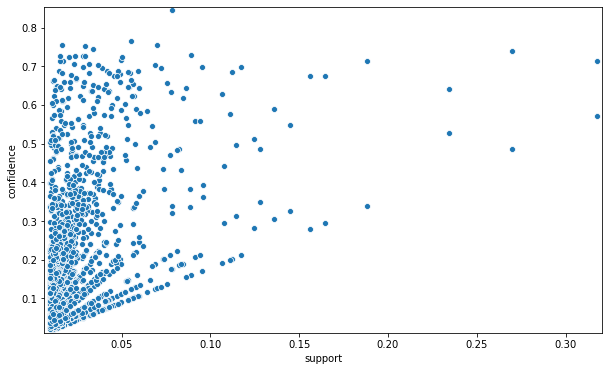

In [55]:
## Apply the Apriori algorithm with a support value of 0.0095
frequent_itemsets = apriori(pt_product, min_support = 0.0095, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric='support', 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.margins(0.01,0.01)
plt.show()

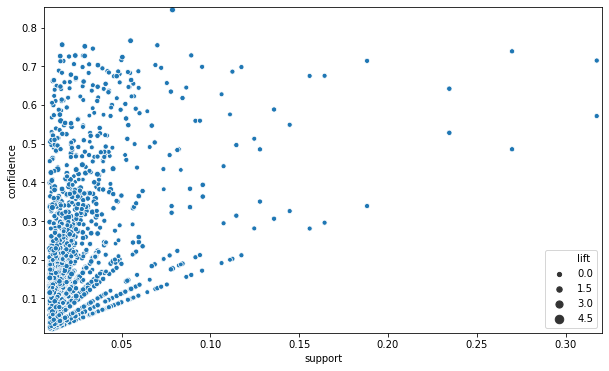

In [56]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()

# Final analysis

##### After the analysis performed, we decided to focus our analysis on metrics lift and zhang to evaluate the complementary and substitute products, and use the A Priori algorithm with min_suport = 0.01

### Final analysis of the products

In [57]:
# Compute frequent itemsets using the Apriori algorithm
frequent_products = apriori(pt_product, 
                            min_support = 0.01, 
                            max_len = 2, 
                            use_colnames = True)

##### Complementary

In [58]:
# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_products1, metric = 'support', min_threshold = 0.01)

# High Confidence and high lift - complementary products
filtered_rules = rules[(rules['lift'] > 1)]

# Compute Zhang's rule
filtered_rules['zhang'] = zhangs_rule(rules)

# Print remaining rule
complements_products = filtered_rules.sort_values(by='zhang', ascending= False ).head(10)

In [59]:
#create the final table
complements_products.reset_index(drop=True,inplace=True)

complements_products.drop(['leverage','conviction'],axis=1)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,zhang
0,(fresh vegetables),(fresh herbs),0.444360,0.093005,0.078655,0.177007,1.903203,0.854096
1,(dry pasta),(pasta sauce),0.070055,0.062660,0.019435,0.277425,4.427464,0.832455
2,(pasta sauce),(dry pasta),0.062660,0.070055,0.019435,0.310166,4.427464,0.825887
3,(canned jarred vegetables),(canned meals beans),0.071890,0.069705,0.017890,0.248852,3.570080,0.775656
4,(canned meals beans),(canned jarred vegetables),0.069705,0.071890,0.017890,0.256653,3.570080,0.773834
5,(fresh vegetables),(canned jarred vegetables),0.444360,0.071890,0.055055,0.123897,1.723429,0.755456
6,(fresh vegetables),(meat counter),0.444360,0.021855,0.016515,0.037166,1.700563,0.741415
7,(fresh vegetables),(poultry counter),0.444360,0.038980,0.029290,0.065915,1.690996,0.735427
8,(chips pretzels),(preserved dips spreads),0.169435,0.032205,0.013960,0.082391,2.558344,0.733383
9,(yogurt),(granola),0.263675,0.028150,0.015730,0.059657,2.119246,0.717257


##### Substitutes

In [60]:
# Substitue products

rulesLift2 = association_rules(frequent_products1, metric="lift", min_threshold=0.0) 

rulesLift2 = rules[(rules['lift'] < 1)]

rulesLift2['zhang'] = zhangs_rule(rules)

# Print remaining rule
substitute_goods= rulesLift2.sort_values(by='zhang', ascending= True ).head(10)

In [61]:
#create the final table
substitute_goods.reset_index(drop=True,inplace=True)
substitute_goods= substitute_goods.drop(['leverage','conviction'],axis=1)
substitute_goods

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,zhang
0,(fresh vegetables),(soft drinks),0.444360,0.087310,0.027845,0.062663,0.717709,-0.414476
1,(fresh fruits),(soft drinks),0.555995,0.087310,0.039585,0.071197,0.815447,-0.337628
2,(packaged vegetables fruits),(soft drinks),0.365415,0.087310,0.024480,0.066992,0.767293,-0.323375
3,(fresh fruits),(energy sports drinks),0.555995,0.024410,0.011220,0.020180,0.826712,-0.320695
4,(soft drinks),(fresh vegetables),0.087310,0.444360,0.027845,0.318921,0.717709,-0.301163
5,(fresh vegetables),(packaged produce),0.444360,0.062270,0.022580,0.050815,0.816037,-0.288620
6,(yogurt),(packaged produce),0.263675,0.062270,0.012665,0.048033,0.771360,-0.287015
7,(soy lactosefree),(soft drinks),0.168355,0.087310,0.011150,0.066229,0.758551,-0.276798
8,(fresh fruits),(cleaning products),0.555995,0.027800,0.013325,0.023966,0.862088,-0.264868
9,(soft drinks),(soy lactosefree),0.087310,0.168355,0.011150,0.127706,0.758551,-0.258574


### Final analysis of the departments

In [62]:
# Compute frequent itemsets using the Apriori algorithm
frequent_department = apriori(pt_department, 
                            min_support = 0.01, 
                            max_len = 2, 
                            use_colnames = True)

##### Complementary

In [63]:
# Recover association rules using a minium support threshold of 0.01
rules2 = association_rules(frequent_department, metric = 'support', min_threshold = 0.01)

# High Confidence and high lift - complementary products
filtered_rules2 = rules2[(rules2['lift'] > 1)]

# Compute Zhang's rule
filtered_rules2['zhang'] = zhangs_rule(filtered_rules2)

# Print remaining rule
complements_dep = filtered_rules2.sort_values(by='zhang', ascending= False ).head(10)

In [64]:
#create the final table
complements_dep.drop(['leverage','conviction'],axis=1)
complements_dep.reset_index(drop=True,inplace=True)
complements_dep

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,(household),(personal care),0.147675,0.099480,0.033120,0.224276,2.254486,0.018429,1.160877,0.652849
1,(personal care),(household),0.099480,0.147675,0.033120,0.332931,2.254486,0.018429,1.277717,0.617910
2,(canned goods),(international),0.211275,0.068990,0.027695,0.131085,1.900059,0.013119,1.071463,0.600590
3,(produce),(canned goods),0.748065,0.211275,0.185695,0.248234,1.174932,0.027648,1.049163,0.590974
4,(produce),(meat seafood),0.748065,0.179535,0.157300,0.210276,1.171225,0.022996,1.038926,0.580280
5,(canned goods),(dry goods pasta),0.211275,0.186190,0.071845,0.340054,1.826384,0.032508,1.233147,0.573673
6,(dairy eggs),(dry goods pasta),0.675600,0.186190,0.154275,0.228353,1.226449,0.028485,1.054640,0.569168
7,(dairy eggs),(breakfast),0.675600,0.163495,0.135295,0.200259,1.224863,0.024838,1.045970,0.565914
8,(dairy eggs),(babies),0.675600,0.054550,0.045045,0.066674,1.222256,0.008191,1.012990,0.560545
9,(pantry),(international),0.347545,0.068990,0.037750,0.108619,1.574417,0.013773,1.044458,0.559187


##### Substitutes

In [65]:
# Recover association rules using a minium support threshold of 0.01
rules3 = association_rules(frequent_department, metric = 'support', min_threshold = 0.01)

# High Confidence and high lift - complementary products
filtered_rules3 = rules3[(rules3['lift'] < 1)]

# Compute Zhang's rule
filtered_rules3['zhang'] = zhangs_rule(filtered_rules3)

# Print remaining rule
substitute_products= filtered_rules3.sort_values(by='zhang', ascending= True ).head(10)

In [66]:
#create the final table
substitute_products.reset_index(drop=True,inplace=True)
substitute_products.drop(['leverage','conviction'],axis=1)
substitute_products

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,(produce),(alcohol),0.748065,0.026005,0.012860,0.017191,0.661066,-0.006593,0.991032,-0.670520
1,(dairy eggs),(alcohol),0.675600,0.026005,0.012800,0.018946,0.728557,-0.004769,0.992805,-0.534561
2,(produce),(pets),0.748065,0.018390,0.011955,0.015981,0.869017,-0.001802,0.997552,-0.374323
3,(alcohol),(produce),0.026005,0.748065,0.012860,0.494520,0.661066,-0.006593,0.498408,-0.344863
4,(alcohol),(dairy eggs),0.026005,0.675600,0.012800,0.492213,0.728557,-0.004769,0.638851,-0.276685
5,(produce),(household),0.748065,0.147675,0.102695,0.137281,0.929615,-0.007775,0.987952,-0.231084
6,(produce),(personal care),0.748065,0.099480,0.070550,0.094310,0.948030,-0.003868,0.994292,-0.178708
7,(pets),(produce),0.018390,0.748065,0.011955,0.650082,0.869017,-0.001802,0.719982,-0.133110
8,(household),(produce),0.147675,0.748065,0.102695,0.695412,0.929615,-0.007775,0.827134,-0.081585
9,(produce),(beverages),0.748065,0.456190,0.334630,0.447327,0.980573,-0.006630,0.983964,-0.072907
